#***#Task3*-Prediction using Decision Tree Algorithm**

**Intern name- Rahul Rajeev Mudatholy**

**1.Problem Statement**-For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**2.Data**-: https://bit.ly/3kXTdox

**3.Features**-The independent features which can be used in training are SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
The dependent feature which is the target variable is the species to which flower belongs to.

In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visual representation of model output
import seaborn as sns#for visualization

from sklearn.model_selection import train_test_split  # to split the data as train and test data sets
from sklearn import metrics # for calculating the accuracy of the model
from sklearn.metrics import confusion_matrix # for understanding the miscalculations in class
from sklearn.tree import DecisionTreeClassifier # for training the model using Decision tree Classifier
from sklearn import tree # for visual representation of model output in a tree structure

## **Reading the data**

In [2]:
# Creating a dataframe from the inbulit dataset iris

from sklearn import datasets
iris=datasets.load_iris()

#FEATURE ANALYSIS & SELECTION
### The independent features which can be used in training are SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
### There are no Null values; no need of imputation or deletion of data.
### The dependent feature which is the target variable is the species to which flower belongs to.

In [3]:
# Independent variables or features 

X_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X_iris.isnull().sum()#checking any missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# Dependent variable or Target feature

y_iris=iris.target
print(y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## **Visualization**

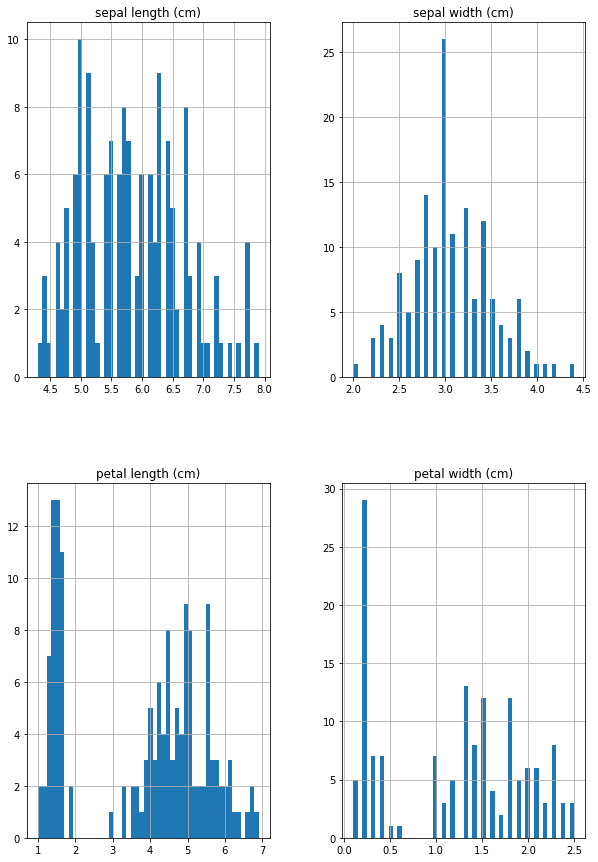

In [8]:
X_iris.hist(bins=50,figsize=(10,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3a9be978>,
      dtype=object)

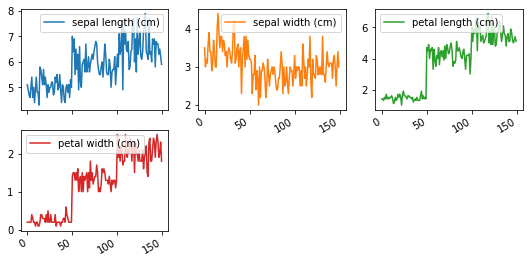

In [9]:
X_iris.plot(kind='line',subplots=True,layout=(3,3),figsize=(9,7))

## **Splitting the data into training and test sets**

In [10]:

# Spliting the dataset in the ratio -> train:test = 70:30
X_train,X_test,y_train,y_test=train_test_split(X_iris,y_iris,test_size=0.3,random_state=0,stratify=y_iris)

## **Training the model**

In [11]:
# Training the Model with default parameters

dtree_clf1=DecisionTreeClassifier()
dtree_clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# The list of column names

columns_list=list(X_iris.columns.values)
columns_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

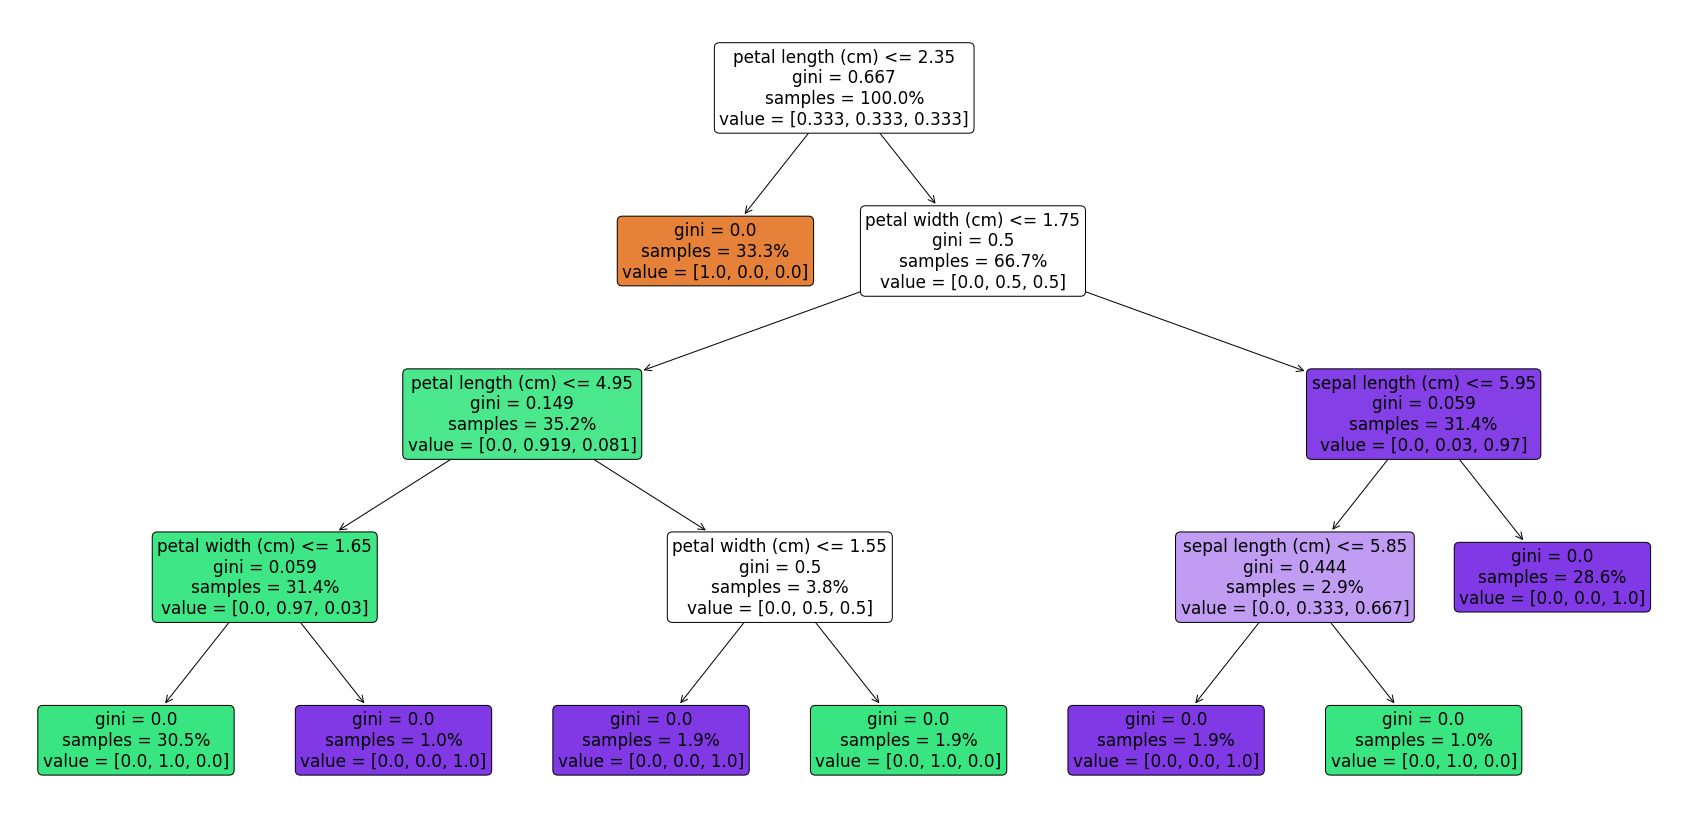

In [13]:
# Visual representation of model output in a tree structure

plt.figure(figsize=(30,15))
tree.plot_tree(dtree_clf1,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

**The above tree has a depth of 4, 6 decision nodes and 8 leaf nodes.**

## **Evaulation**

In [14]:
y_pred1=dtree_clf1.predict(X_test)

In [15]:

#Accuracy score of model with training data

dtree_clf1.score(X_train,y_train)

1.0

In [16]:
#Accuracy score of model with test data

dtree_clf1.score(X_test,y_test)

0.9555555555555556


**The accuracy score is 100% with the training dataset and in case of testing it is only 95.56%. This shows the overfitting problem of Decision Tree Algorithm**

In [17]:
#Understanding Misclassification

cm=confusion_matrix(y_test,y_pred1)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

**From the confusion matrix, it can be observed that there exists 2 misclassifications in prediction.**

#model 2
### Prunning the tree with parameters(max_depth,max_leaf_nodes) to reduce the difference in accuracy score of test and train.

In [18]:
#training
dtree_clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

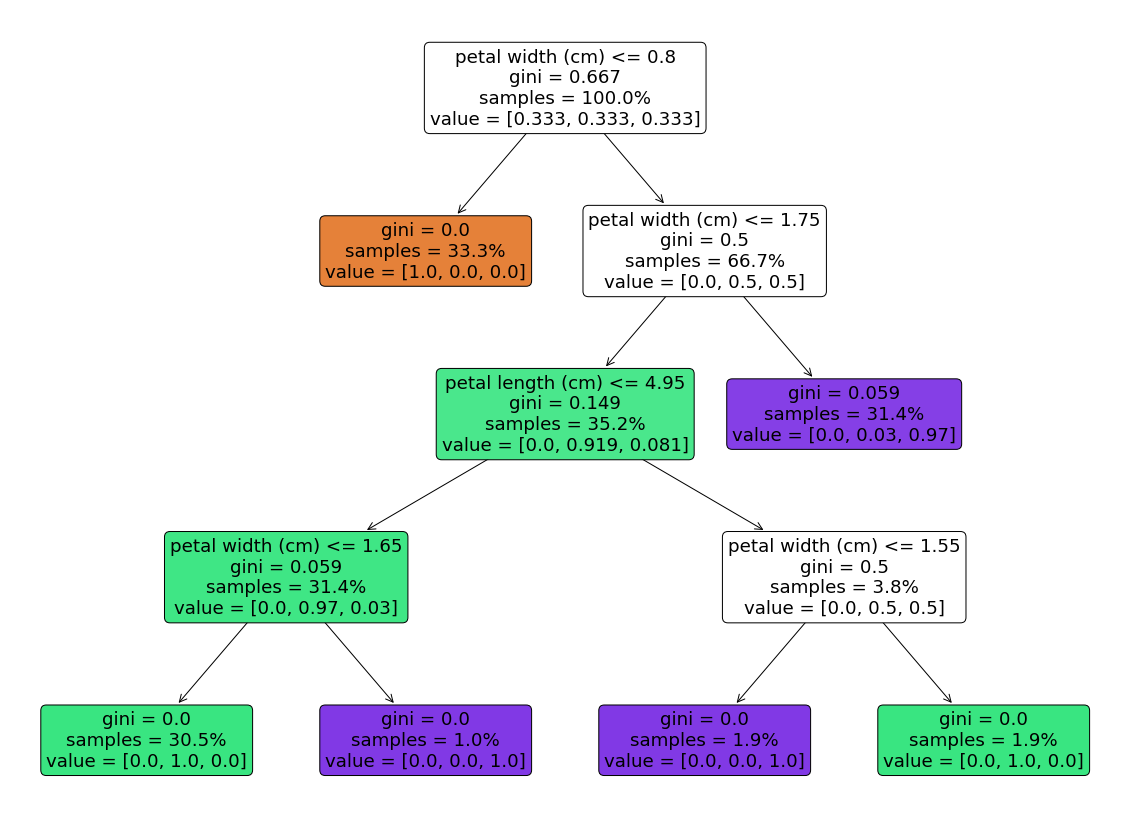

In [19]:
# Visual representation of model output in a tree structure

plt.figure(figsize=(20,15))
tree.plot_tree(dtree_clf2,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

**The above tree has a depth of 4, 4 decision nodes and 6 leaf nodes.**

In [20]:
#Prediction
y_pred2=dtree_clf2.predict(X_test)


In [21]:

dtree_clf2.score(X_train,y_train)

0.9904761904761905

In [22]:
dtree_clf2.score(X_test,y_test)

0.9777777777777777

**The accuracy score is 99% with the training dataset and in case of testing it is only 97.78%. This shows the overfitting problem of Decision Tree Algorithm.**

In [23]:

#Understanding Misclassification

cm=confusion_matrix(y_test,y_pred2)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

### Model building & training using Decision Tree Algorithm for this classification problem statement
### Decision Tree is built with the entire data as training dataset.Predictions can be made with any new unknown dataset.
### Prunning the tree with parameters(max_depth,max_leaf_nodes) to avoid overfitting problem.

## Model3

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


##Training

In [25]:
#Restricting the depth of the tree to 4 and maximum leaf nodes as 6

dtree_clf=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf.fit(X_iris,y_iris)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
#Accuracy score of model with training data

dtree_clf.score(X_iris,y_iris)

0.9866666666666667

**The accuracy score of the model is 98.67% with the training dataset**

## **Visualization**

(0.0, 7.88, -0.9, 3.4800000000000044)

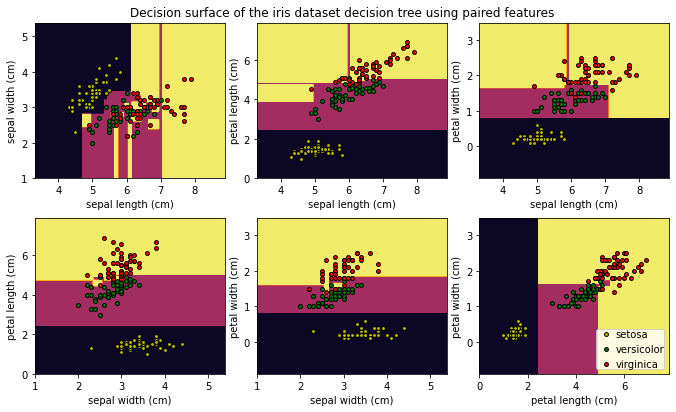

In [27]:
from sklearn.tree import plot_tree

# Parameters
n_classes = 3
plot_colors = "ygr"
plot_step = 0.02

plt.figure(figsize=(10,6))   
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
# We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap='inferno')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                     edgecolor='black', s=15)
        
plt.suptitle("Decision surface of the iris dataset decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


**From the above graphs, it can be observed that :**
### 1.The decision surface for setosa is very clear and distinct, whereas that of versicolor and virginica is very subtle and seems to be overlapping at places; this shows that there may be more similarities in the dimension of these two species when compared with sentosa.
### 2.There may be a possilibity of misclassification in case of versicolor and virginica.

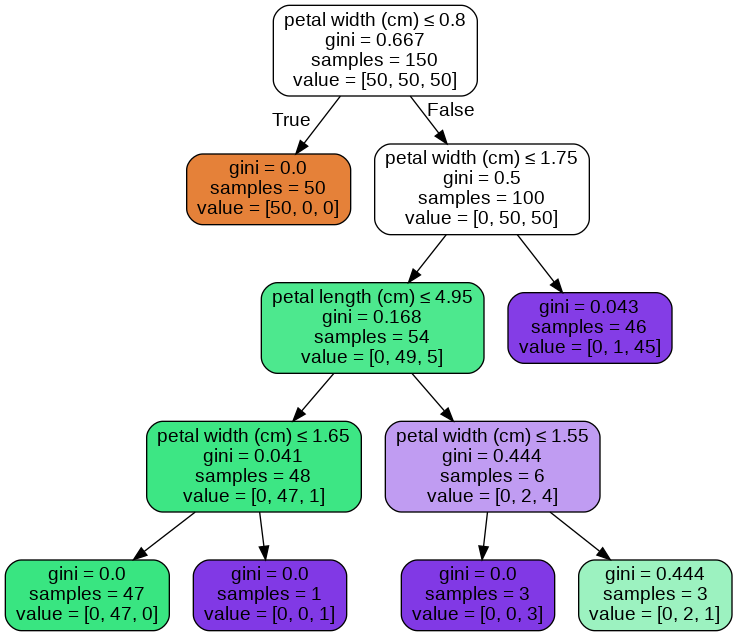

In [28]:

# Visual representation of model output in a tree structure

import os     
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

dot_data = StringIO()
tree.export_graphviz(dtree_clf, out_file=dot_data, feature_names=columns_list,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

**The above tree has a depth of 4, 4 decision nodes and 6 leaf nodes.**

### 1.Trial Models were built to understand the Decision Tree Algorithm.Overfitting problem with training data and eventually the misclassification was observed.Prunning led to decrease in difference in accuracy with train and test data.
### 2.Final model was built as per the probem statement and can be used for predicting the classifcation for new data.The parameters for prunning based on the results of trial models is chosen.The accuracy score of the model is 98.67% with the training dataset.